# __Data Preparation - Préparation des données__


## __1 - Data File__ 

In [1]:
#Data files ...Importer datasets
#   Code Here
from google.colab import drive
drive.mount('/content/drive/') # upload dataset here if you have dataset in google drive

Mounted at /content/drive/


In [1]:
#Reading the dataset
import pandas as pd

df =pd.read_csv("bin_data.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,NoIntrusion
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,NoIntrusion
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,NoIntrusion
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,NoIntrusion
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,NoIntrusion


In [2]:
#Nombre des lignes
print("Nombre des lignes : ",len(df))

Nombre des lignes :  494020


In [3]:
h = df.label.value_counts()
print("classes : ")
print(h)
print("\nNombre de classes sont :", len(h))

classes : 
Intrusion      396743
NoIntrusion     97277
Name: label, dtype: int64

Nombre de classes sont : 2


In [4]:
df.label.value_counts().sort_values()

NoIntrusion     97277
Intrusion      396743
Name: label, dtype: int64

> __Pour afficcher lezs classes en circle %__

In [5]:
import matplotlib.pyplot as plt

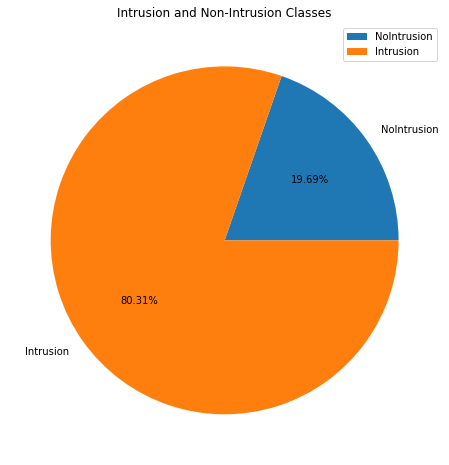

In [7]:
# pie chart distribution of Intruison and Non-Intrusion labels
plt.figure(figsize=(8,8))
plt.pie(df.label.value_counts().sort_values(),labels=df.label.unique(),autopct='%0.2f%%')
#plt.pie(df.label.value_counts(),labels=le1.classes_ ,autopct='%0.2f%%')
plt.title("Intrusion and Non-Intrusion Classes")
plt.legend()
plt.savefig('/content/drive/MyDrive/Datasets/Pie_chart_binary.png')
plt.show()

## __2 - Data Cleaning__

> __Missing values__

In [6]:
#Data Cleaning
#   Code Here
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

> -  __Aucun valurs missing__

## __3 - Features Selection - Selection Des attributes__

In [7]:
DataFtr = df # DataFr pour utiliser dataset dans features selction

> - __Encoding categorical valurs to numbers__

In [8]:
# protocol_type feature mapping
pmap = {'icmp':0, 'tcp':1, 'udp':2}
DataFtr['protocol_type'] = DataFtr['protocol_type'].map(pmap)

# flag feature mapping
fmap = {'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'RSTO':4, 'SH':5, 'S1':6, 'S2':7, 'RSTOS0':8, 'S3':9, 'OTH':10}
DataFtr['flag'] = DataFtr['flag'].map(fmap)

#Service 
Smap = {'http':0, 'smtp':1, 'finger':2, 'domain_u':3, 'auth':4, 'telnet':5, 'ftp':6,
       'eco_i':7, 'ntp_u':8, 'ecr_i':9, 'other':10, 'private':11, 'pop_3':12, 'ftp_data':13,
       'rje':14, 'time':15, 'mtp':16, 'link':17, 'remote_job':18, 'gopher':19, 'ssh':20,
       'name':21, 'whois':22, 'domain':23, 'login':24, 'imap4':25, 'daytime':26, 'ctf':27,
       'nntp':28, 'shell':29, 'IRC':30, 'nnsp':31, 'http_443':32, 'exec':33, 'printer':34,
       'efs':35, 'courier':36, 'uucp':37, 'klogin':38, 'kshell':39, 'echo':40, 'discard':41,
       'systat':42, 'supdup':43, 'iso_tsap':44, 'hostnames':45, 'csnet_ns':46, 'pop_2':47,
       'sunrpc':48, 'uucp_path':49, 'netbios_ns':50, 'netbios_ssn':51, 'netbios_dgm':52,
       'sql_net':51, 'vmnet':52, 'bgp':53, 'Z39_50':54, 'ldap':55, 'netstat':56, 'urh_i':57,
       'X11':58, 'urp_i':59, 'pm_dump':60, 'tftp_u':61, 'tim_i':62, 'red_i':63}

DataFtr['service'] = DataFtr['service'].map(Smap)

#DataFtr.drop('service', axis = 1, inplace = True)

In [9]:
DataFtr.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

> - __X = Tous Les attribures sans class(labesl)__
> - __y = classe(label)__

In [10]:
X = DataFtr[ ['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'] ]

y = DataFtr.label

### __3.1 - Chi-square (Chi2)__

#### __First methode__

In [11]:
## Perform chi2 test
### chi2 returns 2 values
### Fscore and the pvalue
from sklearn.feature_selection import chi2
Chi2Square=chi2(X,y)

In [68]:
Chi2Square

(array([7.18321019e+07, 1.33217849e+05, 4.64411854e+05, 1.29454927e+04,
        1.39780194e+08, 8.82935602e+08, 3.19121885e+00, 7.79210486e+02,
        2.37562973e+00, 3.50428886e+02, 8.80650091e-01, 2.66133562e+05,
        3.98302745e+03, 1.70289676e+01, 6.36071106e+01, 2.13543486e+04,
        1.47833266e+03, 1.22681309e+02, 1.92089639e+03,            nan,
                   nan, 5.14676945e+02, 3.82959638e+07, 3.28794609e+07,
        2.10192479e+04, 2.09599944e+04, 4.69439941e+00, 4.60804837e+00,
        5.75663725e+03, 4.34276621e+01, 4.59442850e+04, 3.67279019e+06,
        1.15283999e+05, 1.33711902e+03, 2.56333077e+03, 4.40711705e+04,
        5.51209251e+03, 2.08990858e+04, 2.11142365e+04, 3.33768818e-01,
        5.27712781e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 7.40347925e-002, 1.78710411e-171,
        1.23241892e-001, 3.41777753e-078, 3.48023686e-001, 0.00000000e+000,
        0.00000000e+000, 3

In [69]:
import pandas as pd

Chi2Square = pd.Series(Chi2Square[0])
Chi2Square.index = X.columns
Chi2Square.sort_values(ascending=False)

dst_bytes                      8.829356e+08
src_bytes                      1.397802e+08
duration                       7.183210e+07
count                          3.829596e+07
srv_count                      3.287946e+07
dst_host_count                 3.672790e+06
service                        4.644119e+05
logged_in                      2.661336e+05
protocol_type                  1.332178e+05
dst_host_srv_count             1.152840e+05
srv_diff_host_rate             4.594428e+04
dst_host_same_src_port_rate    4.407117e+04
lnum_root                      2.135435e+04
dst_host_srv_serror_rate       2.111424e+04
serror_rate                    2.101925e+04
srv_serror_rate                2.095999e+04
dst_host_serror_rate           2.089909e+04
flag                           1.294549e+04
same_srv_rate                  5.756637e+03
dst_host_srv_diff_host_rate    5.512093e+03
lnum_compromised               3.983027e+03
dst_host_diff_srv_rate         2.563331e+03
lnum_access_files              1

#### __Second methode__

In [16]:
import time

In [17]:
#Chi2
#   Code Here
#Import Libraries
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_classif

In [18]:
print('Original X Shape is ' , X.shape)

Original X Shape is  (494020, 41)


> __K = 2__ ----> (Change __K__ value)

In [19]:
FtChi2 = SelectKBest(score_func= chi2 ,k=2) # score_func can = f_classif 
#Xchi2 = FtChi2.fit_transform(X, y)

#showing X Dimension 
#print('X Chi2 Shape is ' , Xchi2.shape)

In [20]:
#Start time
start_time = time.time()

XChi2Sel = FtChi2.fit(X, y)

selected_featChi2= X.columns[(XChi2Sel.get_support())]
print(selected_featChi2)

#End Time
end_time = time.time()
print("Time: ", end_time-start_time)

Index(['src_bytes', 'dst_bytes'], dtype='object')
Time:  1.8795132637023926


> ```python 
Df[ ['src_bytes', 'dst_bytes'] ]#Chi2 Selection

---





# __Data split__

<div>
<h1>
Avant de split, on a choisi les attributes séléctinones (CHi2 par <b>K</b>)
</h1>

</div>


In [21]:
#Data Split
#   Code Here
dfsp = DataFtr[ ['src_bytes', 'dst_bytes', 'label'] ]
dfsp.head()

,src_bytes,dst_bytes,label
0,181,5450,NoIntrusion
1,239,486,NoIntrusion
2,235,1337,NoIntrusion
3,219,1337,NoIntrusion
4,217,2032,NoIntrusion


In [22]:
# Label feature mapping
Lmap = {'NoIntrusion':0, 'Intrusion':1}
dfsp['label'] = dfsp['label'].map(Lmap)

C:\Users\nsc\AppData\Local\Temp/ipykernel_8744/844192966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsp['label'] = dfsp['label'].map(Lmap)


In [23]:
Xsp = dfsp[ ['src_bytes', 'dst_bytes'] ] # Hna nbadlou 3la hsab selection chi2
ysp = dfsp[["label"]]

In [24]:
#Import Libraries
from sklearn.model_selection import train_test_split
#----------------------------------------------------

#Splitting data

X_train, X_test, y_train, y_test = train_test_split(Xsp, ysp, test_size=0.3, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (345814, 2)
X_test shape is  (148206, 2)
y_train shape is  (345814, 1)
y_test shape is  (148206, 1)


# __ML Algorithms__

<div>
<h2>
<b>NB:</b> Avec accuracy, precsion, recall,.., ROC
</h2>
</div>

## __• Supervised learnin__

### __1 - Naives Bayes__

In [25]:
start_time = time.time()

# Naive Baye
#   Code Here
#Naive Bayes Classifier
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score # For accuracy
from sklearn.metrics import precision_score # Precision
from sklearn.metrics import recall_score # Recall
from sklearn.metrics import f1_score # F1 F-mesure


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

NB = GaussianNB()
NB.fit(X_train, y_train)
predictionNB = NB.predict(X_test)

#matrix best display
print("------------------------------------------")
cmtx = pd.DataFrame(
    confusion_matrix(y_test, predictionNB, labels=[1,0]), 
    index=['Intrusion', 'NoIntrusion'], 
    columns=['Intrusion', 'NoIntrusion']
)
print(cmtx)

## matrix 
""" print("------------------------------------------")
    matrix = confusion_matrix(y_test, predictionNB)
    print(matrix)
"""

# Accuracy = TP + TN / P + N
accNB=accuracy_score(predictionNB, y_test)
print("------------------------------------------")
print("Accuracy = ",accNB," %")

#precision = TP / TP + FP
precisionNB = precision_score(predictionNB, y_test)
print("------------------------------------------")
print('Precision = ' ,precisionNB," %")

#Recall = TP / TP + FN
recallNB= recall_score(predictionNB, y_test)
print("------------------------------------------")
print('Recall = ' ,recallNB," %")

# f1= ( 2*Precision * Recall) / precision + recall
f1NB = f1_score(predictionNB, y_test)
print("------------------------------------------")
print('F1 score = ',f1NB, " %")
print("------------------------------------------")

#report = classification_report(y_train, prediction)
#print(report)

#End Time
end_time = time.time()
print("Time: ", end_time-start_time)

C:\Users\nsc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


------------------------------------------
             Intrusion  NoIntrusion
Intrusion           17       119072
NoIntrusion         22        29095
------------------------------------------
Accuracy =  0.1964292943605522  %
------------------------------------------
Precision =  0.00014275037996792315  %
------------------------------------------
Recall =  0.4358974358974359  %
------------------------------------------
F1 score =  0.0002854072929957693  %
------------------------------------------
Time:  1.873685598373413


> <h2> <b>Entropy NB :</b> </h2>

In [26]:
#Entropy NB
from math import log

print("Entropy is: "+ str(-precisionNB*log(precisionNB)))

Entropy is: 0.001263970826946388


In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

No handles with labels found to put in legend.


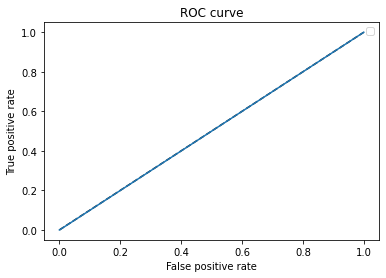

In [28]:
#define metrics
#define metrics
import matplotlib.pyplot as plt

fprNB, tprNB, _ = metrics.roc_curve(y_test, predictionNB)
aucNB = auc(fprNB, tprNB)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprNB, tprNB)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('NB2Chi2_binary_roc.png')
plt.show()

In [29]:
tprNB

array([0.0000000e+00, 1.4275038e-04, 1.0000000e+00])

In [30]:
fprNB

array([0.00000000e+00, 7.55572346e-04, 1.00000000e+00])

### __2 - KNN - KPPV__

In [34]:
start_time = time.time()

# KNN - KPPV
#   Code Here
#Import Libraries
from sklearn.neighbors import KNeighborsClassifier
#----------------------------------------------------

#Applying KNeighborsClassifier Model 

'''
#sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform’, algorithm=’auto’, leaf_size=30,
#                                       p=2, metric='minkowski’, metric_params=None,n_jobs=None)
'''

KNN = KNeighborsClassifier(n_neighbors= 3) # it can be ball_tree, kd_tree,brute
KNN.fit(X_train, y_train)

predictionKNN = KNN.predict(X_test)

#matrix best display
print("------------------------------------------")
cmtx = pd.DataFrame(
    confusion_matrix(y_test, predictionKNN, labels=[1,0]), 
    index=['Intrusion', 'NoIntrusion'], 
    columns=['Intrusion', 'NoIntrusion']
)
print(cmtx)

## matrix 
    #print("------------------------------------------")
    #matrix = confusion_matrix(y_train, prediction)
    #print(matrix)

# Accuracy
accKNN=accuracy_score(predictionKNN, y_test)
print("------------------------------------------")
print("Accuracy = ",accKNN," %")

#precision
precisionKNN = precision_score(predictionKNN, y_test)
print("------------------------------------------")
print('Precision = ' ,precisionKNN," %")

#Recall
recallKNN= recall_score(predictionKNN, y_test)
print("------------------------------------------")
print('Recall = ' ,recallKNN," %")

# f1: 2 tp / (2 tp + fp + fn)
f1KNN = f1_score(predictionKNN, y_test)
print("------------------------------------------")
print('F1 score = ',f1KNN, " %")
print("------------------------------------------")

#report = classification_report(y_train, prediction)
#print(report)

#End Time
end_time = time.time()
print("Time: ", end_time-start_time)

C:\Users\nsc\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


------------------------------------------
             Intrusion  NoIntrusion
Intrusion       119058           31
NoIntrusion       1591        27526
------------------------------------------
Accuracy =  0.9890557737203622  %
------------------------------------------
Precision =  0.9997396904835879  %
------------------------------------------
Recall =  0.9868129864317151  %
------------------------------------------
F1 score =  0.9932342807564926  %
------------------------------------------
Time:  283.4906165599823


> <h2> <b>Entropy KNN </b> </2>

In [35]:
#Entropy KNN
from math import log

print("Entropy KNN of is: " + str(-precisionKNN*log(precisionKNN)))

Entropy KNN of is: 0.0002602756329497364


No handles with labels found to put in legend.


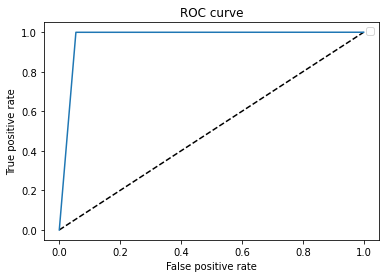

In [88]:
#define metrics
#define metrics
import matplotlib.pyplot as plt

fprKNN, tprKNN, _ = metrics.roc_curve(y_test, predictionKNN)
aucKNN = auc(fprNB, tprKNN)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprKNN, tprKNN)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Multiply 2/KNN2_binary_roc.png')
plt.show()

In [89]:
tprKNN

array([0.        , 0.99973969, 1.        ])

In [90]:
fprKNN

array([0.        , 0.05457293, 1.        ])

### __3 - ID3 - Decision Tree(Arbre de Décisiuon)__

In [42]:
start_time = time.time()
# DT 
#   Code Here

#Decision TreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree


DT = tree.DecisionTreeClassifier(criterion="entropy", max_depth=4)
DT.fit(X_train, y_train)
predictionDT = DT.predict(X_test)

#matrix best display
print("------------------------------------------")
cmtx = pd.DataFrame(
    confusion_matrix(y_test, predictionDT, labels=[1,0]), 
    index=['Intrusion', 'Intrusion'], 
    columns=['Intrusion', 'Intrusion']
)
print(cmtx)

## matrix 
    #print("------------------------------------------")
    #matrix = confusion_matrix(y_train, prediction)
    #print(matrix)

# Accuracy
accDT=accuracy_score(predictionDT, y_test)
print("------------------------------------------")
print("Accuracy = ",accDT," %")

#precision
precisionDT = precision_score(predictionDT, y_test)
print("------------------------------------------")
print('Precision = ' ,precisionDT," %")

#Recall
recallDT= recall_score(predictionDT, y_test)
print("------------------------------------------")
print('Recall = ' ,recallDT," %")

# f1: 2 tp / (2 tp + fp + fn)
f1DT = f1_score(predictionDT, y_test)
print("------------------------------------------")
print('F1 score = ',f1DT, " %")
print("------------------------------------------")

#report = classification_report(y_train, prediction)
#print(report)

#End Time
end_time = time.time()
print("Time: ", end_time-start_time)

------------------------------------------
           Intrusion  Intrusion
Intrusion     118994         95
Intrusion       2019      27098
------------------------------------------
Accuracy =  0.9857360700646398  %
------------------------------------------
Precision =  0.9992022772884146  %
------------------------------------------
Recall =  0.9833158420996091  %
------------------------------------------
F1 score =  0.991195408618004  %
------------------------------------------
Time:  1.4303364753723145


> <h2> <b>Entropy DT </b> </2>

In [43]:
#Entropy KNN
from math import log

print("Entropy DT of is: " + str(-precisionDT*log(precisionDT)))

Entropy DT of is: 0.0007974044461826769


No handles with labels found to put in legend.


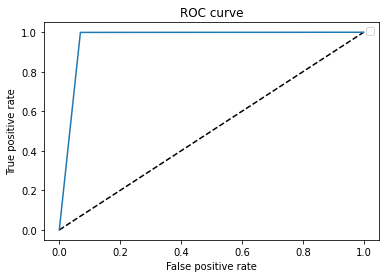

In [93]:
#define metrics
#define metrics
import matplotlib.pyplot as plt

fprDT, tprDT, _ = metrics.roc_curve(y_test, predictionDT)
aucDT = auc(fprDT, tprDT)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fprDT, tprDT)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.savefig('/content/drive/MyDrive/Multiply 2/DT2_binary_roc.png')
plt.show()

In [94]:
tprDT

array([0.        , 0.99920228, 1.        ])

In [95]:
fprDT

array([0.        , 0.06934093, 1.        ])

## __• Unsupervised learning__

### __1 - K-means__

In [96]:
# K-means
#   Code Here
#Import Libraries
from sklearn.cluster import KMeans

In [97]:
start_time = time.time() # time

KMns = KMeans(n_clusters=5,init='k-means++', #also can be random
                     random_state=33,algorithm= 'auto'
)
KMns.fit(X_train, y_train)

predictionKMns = KMns.predict(X_test)


#matrix best display
print("------------------------------------------")
cmtx = pd.DataFrame(
    confusion_matrix(y_test, predictionKMns, labels=[1,0]), 
    index=['Intrusion', 'NoIntrusion'], 
    columns=['Intrusion', 'NoIntrusion']
)
print(cmtx)

## matrix 
    #print("------------------------------------------")
    #matrix = confusion_matrix(y_train, prediction)
    #print(matrix)

# Accuracy
accKMns=accuracy_score(predictionKMns, y_test)
print("------------------------------------------")
print("Accuracy = ",accKMns," %")

#precision
precisionKMns = precision_score(predictionKMns, y_test, average='micro')
print("------------------------------------------")
print('Precision = ' ,precisionKMns," %")

#Recall
recallKMns= recall_score(predictionKMns, y_test, average='micro')
print("------------------------------------------")
print('Recall = ' ,recallKMns," %")

# f1: 2 tp / (2 tp + fp + fn)
f1KMns = f1_score(predictionKMns, y_test, average='micro')
print("------------------------------------------")
print('F1 score = ',f1KMns, " %")
print("------------------------------------------")

#report = classification_report(y_train, prediction)
#print(report)

#End Time
end_time = time.time()
print("Time: ", end_time-start_time)

------------------------------------------
             Intrusion  NoIntrusion
Intrusion            0       119068
NoIntrusion          0        29110
------------------------------------------
Accuracy =  0.1964157996302444  %
------------------------------------------
Precision =  0.1964157996302444  %
------------------------------------------
Recall =  0.1964157996302444  %
------------------------------------------
F1 score =  0.19641579963024436  %
------------------------------------------
Time:  1.309974193572998


> <h2> <b>Entropy K-means </b> </2>

In [98]:
#Entropy KNN
from math import log

print("Entropy K-means of is: " + str(-precisionKMns*log(precisionKMns)))

Entropy K-means of is: 0.3196709250755321
